<div class="alert alert-block" style="color: green">
    <h1><center> DAKD 2024 EXERCISE 2: SUPERVISED LEARNING  </center></h1>

### Fill in your name, student id number and email address
#### name: Otso Santala
#### student id: 2110554
#### email: ojsant@utu.fi

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about the data, so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is <font color = green>modeling</font>.

The questions to be answered at this stage could include:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should never forget it in your future data analyses</i>.

-----

#### General Guidance for Exercises

- <b>Complete all tasks:</b> Make sure to answer all questions, even if you cannot get your script to fully work.
- <b>Code clarity:</b> Write clear and readable code. Include comments to explain what your code does.
- <b>Effective visualizations:</b> Ensure all plots have labeled axes, legends, and captions. Your visualizations should clearly represent the underlying data.
- <b>Notebook organization:</b> You can add more code or markdown cells to improve the structure of your notebook as long as it maintains a logical flow.
- <b>Submission:</b> Submit both the .ipynb and .html or .pdf versions of your notebook. Before finalizing your notebook, use the "Restart & Run All" feature to ensure it runs correctly.
- <b>Grading criteria:</b>
    - The grading scale is *Fail*/*Pass*/*Pass with honors* (+1).
    - To pass, you must complete the required parts 1-4.
    - To achieve Pass with honors, complete the bonus exercises.
- <b>Technical issues:</b>
    - If you encounter problems, start with an online search to find solutions but do not simply copy and paste code. Understand any code you use and integrate it appropriately.
    - Cite all external sources used, whether for code or explanations.
    - If problems persist, ask for help in the course discussion forum, at exercise sessions, or via email at tuhlei@utu.fi, aibekt@utu.fi.
- <b>Use of AI and large language models:</b>
    - We do not encourage the use of AI tools like ChatGPT. If you use them, critically evaluate their outputs.
    - Describe how you used the AI tools in your work, including your input and how the output was beneficial.
- <b>Time management:</b> Do not leave your work until the last moment. No feedback will be available during weekends.
- <b>Additional notes:</b>
    - You can find the specific deadlines and session times for each assignment on the Moodle course page.
    - Ensure all your answers are concise—typically a few sentences per question.
    - Your .ipynb notebook is expected to be run to completion, which means that it should execute without errors when all cells are run in sequence.
 are run in sequence.


<font color = green> The guided exercise session is held on the 27th of November at 14:15-16:00, at lecture hall X, Natura building.</font>

<font color = red size = 4>The deadline is the 2nd of December at 23:59</font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### <font color = red> Packages needed for this exercise: </font>

You can use other packages as well, but this excercise can be completed with those below.

In [1]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is a classic supervised machine learning technique based on the assumption that data points with similar features tend to belong to the same class, and thus are likely to be near each other in feature space.

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`. Let's have a brief look at the features again:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in years 
| sex | binary | Female == 0, Male == 1
| height | numeric | Measured weight of the patient (kg)
| weight | numeric | Measured weight of the patient (cm)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| alco | binary | A subjective feature based on asking the patient whether or not he/she consumes alcohol
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| gluc | categorical | Glucose associated risk information evaluated by a doctor

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1000 rows from the dataframe using a fixed random seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: As mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's a new variable, `gluc` (about glucose aka blood sugar levels), which is also one-hot-encoded for you. It has similar values as `cholesterol`.*


In [2]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [3]:
### Code - Resample and print 15 rows¨

# Initialize RNG with fixed seed
rng = np.random.default_rng(1234)

# Return a sample of 1000 using rng as random number generator
r_sample = cardio_data.sample(1000, random_state=rng)
r_sample.head(15)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_at_risk,cholesterol_elevated,gluc_normal,gluc_at_risk,gluc_elevated
3384,63,1,166,62.0,120,80,0,0,0,0,1,0,0,1,0,0
5003,63,0,152,65.0,140,100,0,0,0,1,0,1,0,1,0,0
1501,44,0,168,72.0,120,80,0,0,1,0,1,0,0,1,0,0
317,56,1,170,86.0,130,80,0,0,1,0,0,1,0,0,1,0
4750,56,1,182,68.0,150,100,0,0,1,1,0,1,0,1,0,0
3841,64,1,171,68.0,120,80,0,0,1,0,1,0,0,1,0,0
4034,49,1,162,76.0,130,80,0,0,1,0,1,0,0,1,0,0
4805,61,0,157,92.0,120,90,0,0,1,1,0,0,1,1,0,0
1831,51,1,172,68.0,110,70,0,0,1,0,1,0,0,1,0,0
1682,41,0,168,71.0,110,70,0,0,1,0,1,0,0,1,0,0


----

We have the data so now, let's put it to use. All the analyses will be done based on this sample of 1000.

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

Before the exercise itself, we might as well discuss about the reproducibility of experiments we conduct in research. It can be quite a nightmare for some if code spewed out only random results. To address this, we can set a **random seed** to ensure that any random processes, such as splitting our dataset into training and test sets, yield consistent results across multiple runs. By using a fixed random seed, we enhance the reproducibility of our experiments, making it easier to validate findings. In fact, we already used one when sampling our subset from the loaded dataset.

**Exercise 1 B)**

Gather the features into one array and the target variable into another array. Create training and test data by splitting the data into training (80%) and test (20%) sets. Use a fixed random seed to ensure that even if you execute this cell hundreds of times, you will get the same split each time.

- Do you need stratification for our dataset? Explain your decision.

In [4]:
### Code - Train-test split

feats = r_sample.copy()

# Pop, so now feats is without cardio
cardio = feats.pop('cardio')

cardio_training, cardio_test, feats_training, feats_test = train_test_split(cardio, feats, test_size=0.20, random_state=123, stratify=cardio)


<font color = lightcoral>The training set and test set should have the same distribution as the whole set, so stratification is done here to ensure that.</font>

----------

**Exercise 1 C)** 

Standardize the numerical features in both the train and test sets.

- Explain how the k-NN model makes predictions about whether or not a patient has cardiovascular disease (CVD) when the features are not standardized. Specifically, discuss how the varying scales of different features can influence the model's predictions, and how standardization would change this influence.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [5]:
### Code - Standardization

# Separate numerical features from the rest
num_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

scaler = StandardScaler()

# Test data must be transformed the same way, so first we fit scaler to training data and then
# we transform both with the same scaler. No additional fitting to test data.
feats_train_scaled = pd.DataFrame(scaler.fit_transform(feats_training), index=cardio_training.index)
feats_test_scaled = pd.DataFrame(scaler.transform(feats_test), index=cardio_test.index)

<font color = lightcoral> Standardization is the act of transforming the variable to have mean 0 and variance 1 by subtracting the mean and dividing by the standard deviation. This needs to be done for k-NN algorithm since classification is based on computing the distance of the sample point to its neighbors and assigning it the majority class of its k nearest neigbors. Distance measurement is meaningless if the features have different units or scales, and it leads into a bias towards the class with smaller numerical values (large numerical values -> large distance -> point isn't considered to be near the "correct" label.) For example, a dataset with two closely related features measured in grams and milligrams respectively makes points have very different neighborhoods compared to converting one of them to the other, so misclassification is very much likely to happen.</font>

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

*Note: We are very aware that there are functions available for these metrics, but this time, please calculate them using the confusion matrix.*

In [6]:
### Code - the kNN classifier

k_nn_classifier = KNeighborsClassifier(3)

# Fit training data
trained_model = k_nn_classifier.fit(feats_train_scaled, cardio_training)

# Predict values for test data
cardio_pred = trained_model.predict(feats_test_scaled)

# Confusion matrix and its entries
confusion = metrics.confusion_matrix(cardio_test, cardio_pred)

true_neg = confusion[0,0]
false_pos = confusion[0,1]
false_neg = confusion[1,0]
true_pos = confusion[1,1]

# Print confusion matrix and  metrics
print("Confusion matrix:\n", confusion)
# Accuracy: (TP + TN)/(P + N)
print(f"Accuracy: {(true_neg + true_pos)/(len(cardio_test))}")
# Precision: TP/(TP + FP)
print(f"Precision: {true_pos/(true_pos + false_pos)}")
# Recall: TP/(TP + FN)
print(f"Recall: {true_pos/(true_pos + false_neg)}")



Confusion matrix:
 [[121  17]
 [ 41  21]]
Accuracy: 0.71
Precision: 0.5526315789473685
Recall: 0.3387096774193548


<font color = lightcoral>The confusion matrix tells the amounts of each different possible prediction (true positive, false positive, false negative and true negative). For example the element in position (0,0) (with value 121) tells the amount of true negatives, that is, how many negative results we're correctly predicted. Generally entry (i,j) tells how many instances in the ith class were predicted to be in the jth class. So in this case there were 121 true negatives (correctly predicted no CVD), 17 false positive (incorrectly pred. CVD), 41 false negatives (incorrectly pred. no CVD) and 21 true positives (correctly pred. CVD).

Based on the performance metrics, the model classified correclty 71 % of all instances (accuracy) but only 55.2 % of the positive results (precision). Only 33.9 % of all positive test cases were correclty classified as true positives (recall). Accuracy is thus an unreliable metric for assessing positive predictions. In this case accuracy might be lowered by irrelevant features. For example, it may be worth considering, if height has any correlation with CVD diagnosis.
 </font>

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire sample of 1000 on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This can certainly be done manually, but `cross_val_score` is also a very handy function.*

In [7]:
### Code - Leave-one-out cross-validation

feats_scaled = scale(feats[num_features])

# Passing this to cross_val_score does the splitting automatically
loo = LeaveOneOut()

# Cross-validation scores
scores = cross_val_score(k_nn_classifier, feats_scaled, cardio, cv=loo)

# Default score associated with KNeighborsClassifier is "mean accuracy" (from docs),
# which is the same as accuracy in the previous exercise. 'scores' is an ndarray of those
# default scores, now calculated with LOO splits. Mean of 'scores' should tell if the k-NN
# works for this problem or not.
print("Mean accuracy with 1 split:", k_nn_classifier.score(feats_test_scaled, cardio_test))
print("Mean accuracy with leave-one-out CV: ", scores.mean())



Mean accuracy with 1 split: 0.71
Mean accuracy with leave-one-out CV:  0.676


<font color = royalblue> The accuracy may look worse, but in reality since LOO-CV does use practically the entire set as training for the model and tests each model individually, LOO-CV gives a far more realistic accuracy measure. Still, over a third of instances were misclassified, so solely based on this k-NN isn't probably the best method. Hyperparameter tuning will ultimately decide its fate.</font>

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters, such as the used distance measure. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k, and use default values for all the other hyperparameters. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire sample of 1000 on this task.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [8]:
### Code - Select best model
accuracies = []
k_vals = range(1,31)

for k in k_vals:
    model = KNeighborsClassifier(k)
    cv_scores = cross_val_score(model, feats_scaled, cardio, cv=loo)
    accuracy = cv_scores.mean()
    accuracies.append(accuracy)

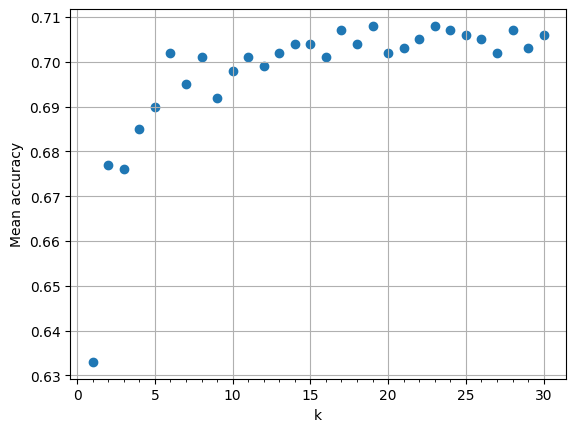

In [9]:
### Code - Plot the accuracies vs. the values for k

fig, axs = plt.subplots(figsize=(6.4,4.8))

axs.set_xlabel("k")
axs.set_ylabel("Mean accuracy")
axs.grid(True)
axs.set_xticks(k_vals, minor=True)

axs.scatter(k_vals, accuracies)

<font color = green>k = 18 and k = 23 produce the best results. Depending on the algorithm for distance calculation k = 18 may be computationally more efficient since less neighbors have to be determined. Compared to k = 3, the accuracy is about 5 % better, so nothing huge but still an improvement.

When k is increased, accuracy approaches the proportion of patients with no CVD in the sample. This is because the classifier includes many more neighbors, and eventually every instance in the sample is a neighbor. Then the majority class, which is no CVD, is assigned and new classifications are correct only when the patient doesn't have CVD, which is about 70 % of the time. So when k is small the model is overfitted and doesn't generalise well on new data and the accuracy is worse than with higher values, and with higher k the model always guesses that the patient doesn't have CVD. </font>

_____________________

## <font color = darkorange> 4. Ridge regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healthy/sick) to estimating continuous values. The following exercises are going to involve utilizing one regression model, <font color = darkorange>Ridge Regression</font>, and our goal is to evaluate the performance of this model. 

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as


| Feature | Type | Explanation |
| :- | :- | :-
|sex|binary| Sex, either male (0) or female (1)
|age|numeric| Age in years
|len_head|numeric| Head length in mm
|width_skull|numeric| Skull width in mm
|len_earconch|numeric| Ear conch length in mm
|width_eye|numeric| Distance from medial canthus to lateral canthusof right eye, i.e., eye width in mm
|len_foot|numeric| Foot length in mm
|len_tail|numeric| Tail length in mm
|chest|numeric| Chest grit in mm
|belly |numeric| Belly grit in mm
|len_total|numeric| Total length in mm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [10]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examining those relationships between the variables in the given dataset.


**Exercise 4 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable. 

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

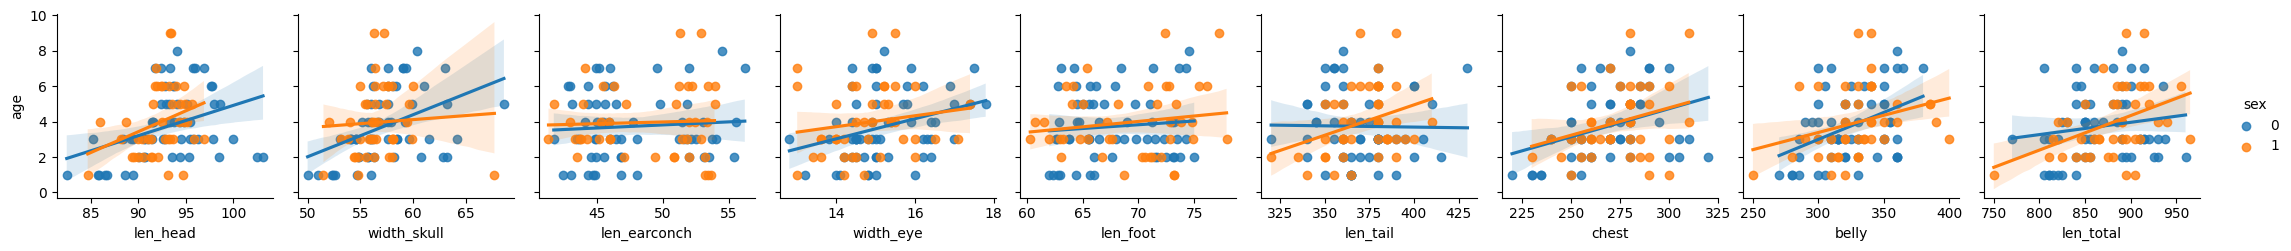

In [11]:
### Code - Pairplot
 
sns.pairplot(possum_data, x_vars=possum_data.loc[:,'len_head':'len_total'], y_vars='age', hue='sex', kind='reg')

<font color = darkorange>Some correlations with age are apparent, such as head and total length, skull and eye widths and chest and belly grits. There's little to no correlation with ear conch lengths and foot lengths. Tail length seems to be correlated only in females. Skull width has a single female outlier that causes a huge error. Other than that some features are correlated more with females and some more with males. </font>

<font color = darkorange>Some other plots for data inspection:</font>

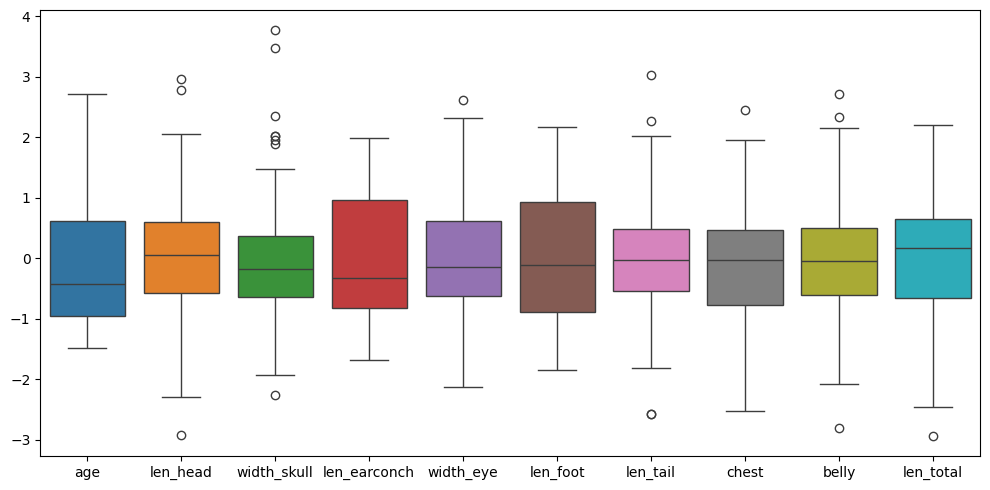

In [13]:
fig, axs = plt.subplots(figsize=(10,5))
possum_num_data = possum_data.loc[:,'age':]
possum_num_data_scaled = pd.DataFrame(scale(possum_num_data), columns=possum_num_data.columns)
sns.boxplot(possum_num_data_scaled, ax=axs)
plt.tight_layout()


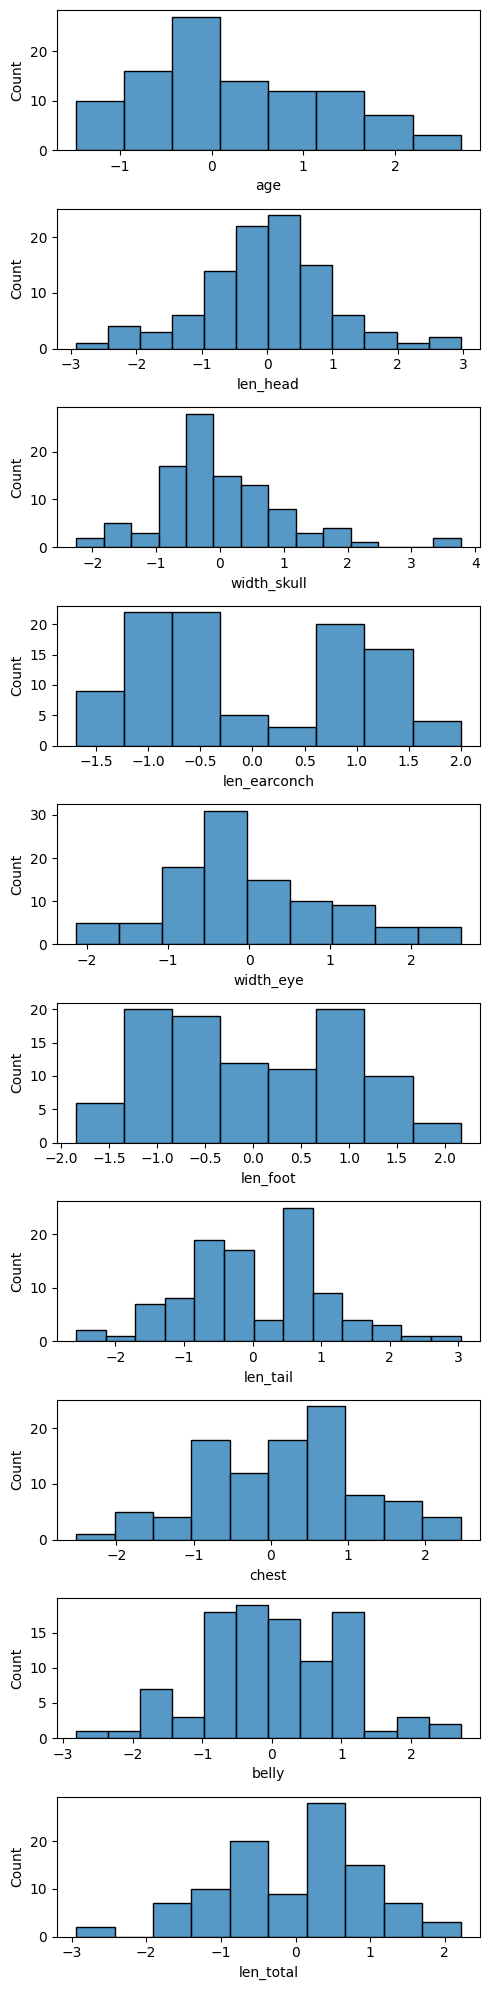

In [14]:
fig, axs = plt.subplots(10, figsize=(5,20))

for j, feat in enumerate(possum_num_data.columns):
    sns.histplot(data=possum_num_data_scaled[feat], ax=axs[j])

plt.tight_layout()

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to test the overall performance of the model using the test set.

**Exercise 4 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split. 

*Note: Set the features in the dataframe named as `possum_X` so you can play around with the upcoming code snippet.*

<font color = darkorange>Chest, belly, tail and total sizes are some 10-100 times larger scales compared to others, so scaling should probably be done in this case. Same units don't quarantee same scale. (source: https://stats.stackexchange.com/questions/111017/question-about-standardizing-in-ridge-regression) Sex feature should probably be left as is but I couldn't figure out how despite all my efforts. Inspecting the additional plots I made above, skull width has quite many outliers in the positive direction, which could lead to problems when doing a random train-test split. The split is checked manually to see if the the split distributions look the same as the original ones, but no outliers should be left out since there isn't any way of knowing if they are true outliers or errors.</font>

In [15]:
### Code - Data preparation
possum_copy = possum_data.copy()
age = possum_copy.pop('age')
possum_train, possum_test, age_train, age_test= train_test_split(possum_copy, age, test_size=0.2, random_state=321)

# Couldn't figure out an easy way to keep sex as unnormalized binary values, since the scaling
# converted the objects between different types and all other weird stuff also happened. But I figured
# the two values would still be distinguishable as male and female, so no harm done, I guess?
scaler = StandardScaler()
possum_train = pd.DataFrame(scaler.fit_transform(possum_train), columns=possum_copy.columns)
possum_test = pd.DataFrame(scaler.transform(possum_test), columns=possum_copy.columns)


<Axes: xlabel='width_skull', ylabel='Count'>

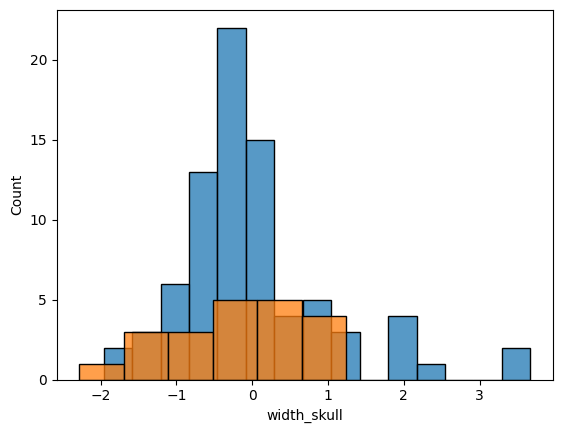

In [16]:
# Plotting to visually inspect the split distributions
sns.histplot(data=possum_train['width_skull'])
sns.histplot(data=possum_test['width_skull'])


------

Regarding Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it).

**Exercise 4 C)**

Fit a ridge regression model with the whole training set. For the hyperparameter 'lambda', use 64. Evaluate the model using the test set and describe the results. For evaluating on the test set, use a metric called mean absolute error (MAE).

- How well did the model perform in estimating the possums' ages?
- How do you interpret the MAE in our case when the target variable is age?

In [17]:
## Code - Ridge regression

model = Ridge(64)
model.fit(possum_train, age_train)

age_pred = model.predict(possum_test)


print("Predicted ages:", age_pred.round(3))
print("True ages:", age_test.to_numpy())
print("Mean absolute error:", metrics.mean_absolute_error(age_test, age_pred))


Predicted ages: [3.678 3.742 3.535 3.405 4.718 4.14  3.737 4.154 4.007 3.144 2.658 2.492
 3.56  4.396 3.667 4.37  2.975 3.902 3.359 3.544 3.01 ]
True ages: [4. 3. 2. 3. 3. 2. 7. 6. 9. 3. 1. 1. 4. 7. 7. 4. 1. 6. 3. 4. 3.]
Mean absolute error: 1.5191953793960677


<font color = darkorange>Model's estimations are at least in the same ball park, but it fails at any accurate prediction. Among the predictions are no ages over 5. It could be that my data preprocessing failed since I don't know if I should have normalized the ages. It's also seems that the test set had more younger specimen: 15 % of the training set were over the age 5 vs. nearly 30 % of the test set. MAE tells how many years the prediction was off on average, and is large probably because of the lower age bias in training data. Trying different splits yielded very varied values for MAE, from 1 up to 1.7. Better evaluation should probably be done using CV.</font>

Now that we have fitted the regression model, let's break it down for better understanding what is actually happening here. Remember that the model here is essentially just a linear regression model with an added regularization term to deal with e.g overfitting and multicollinearity. We can write the equation used by the model to predict an opossum's age as:

$$
\text{Predicted age} = w_1 \times \text{Sex} + w_2 \times \text{Head length} + w_3 \times \text{Skull width} + ... + w_{10} \times \text{Total length} + \text{Bias}
$$

As mentioned earlier, regression focuses on the relationships between the features and the target variable. In the equation above, each feature contibutes a certain amount to the predicted age, based on the weight $w_i$ learned for that feature. For example, if the total length of an opossum has a large positive weight, it suggests that opossums with greater length are predicted to be older. On the other hand, if the skull width of an opossum has a negative weight, it indicates that opossums with wider skulls are predicted to be younger. In this case, as skull width increases, the predicted age decreases.

Different classes have different class attributes that you can access after e.g. fitting a model, and the `Ridge` class is no exception: For example, the `coef_` variable contains the learned weights $w_1, ..., w_{10}$ that represent the relationship between the features and the target (a.k.a age) variable. The `intercept_` variable holds the bias term (or the intercept, however we wanna call it). 

We can now write down the equation used by our fitted model. You can experiment with it by adjusting the regularization term or using a different sample, if you'd like, to see how the weights and bias change. This is just extra!

In [18]:
# NOTE: To make this code chunk to work with the already fitted model, 
#       the model variable needs to be named as `ridge_model`. Also, the
#       initial feature dataframe is named here as `possum_X`.


coefficients = model.coef_ # CHANGE THE VARIABLE NAME IF NOT WROTE AS THIS
bias = model.intercept_ # # CHANGE THE VARIABLE NAME IF NOT WROTE AS THIS
feature_names = possum_train.columns # CHANGE THE VARIABLE NAME HERE IF NOT AS WROTE AS THIS

# Let's write the equation
equation = 'Predicted age = '
for i in range(len(coefficients)):
    equation += f'{coefficients[i]:.3f}*{feature_names[i]} + '

equation += f'{bias:.3f}'
print(equation)

Predicted age = 0.082*sex + 0.101*len_head + 0.050*width_skull + 0.003*len_earconch + 0.112*width_eye + -0.048*len_foot + 0.013*len_tail + 0.223*chest + 0.206*belly + 0.009*len_total + 3.788


________________
## <font color = slategrey> BONUS: Feature selection - most useful features in predicting cardiovascular diseases </font>

You can stop here and get the "pass" grade! To get the pass with honors, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and especially ***why*** you did it. Please note that submitting only code will not be awarded a pass with honors.

----------------


Due to the lack of resources and time, doctors can't measure all the values represented in the given cardio dataset. Fortunately, eager students are willing to help: Your task is to identify <font color = slategrey>five [5] most useful features</font> for predicting the presence of the CVD from the dataset. The steps needed for this job are presented above except the feature selection part. You must remember not to leak any information from the test set when selecting the features, i.e., you try to find those five features using only the training set.

Regarding the feature selection itself, you're asked to use <font color = slategrey>Random Forest</font>. To do this, use the Random Forest classifier's built-in feature importance estimation in scikit-learn. Explain briefly the working of the model on the given cardio dataset: How does the model select features that are relevant in predicting CVD?

Evaluate the model of your choice using accuracy and the area under the ROC curve (AUC). Draw the corresponding curve in a plot.  **Discuss** your findings and results.

What goes wrong in your AUC analysis, if you use the predictions from the `predict()` function instead of the `predict_proba()` function to calculate the AUC?

In [19]:
## Code - Bonus task

<font color = slategrey>\<Write your answer here\></font>